# IEMS 351: Homework #2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Problem 1

* Since the scatter plot decreases and increases, the relationship between z and y is visually non-linear. Hence, any form of a linear regression model we suggest wouldn't work. Instead, we should try using some polynomial regression that captures the shape.
* Specifically, quadratic regression might work assuming that the points in the image $-0.5 \le z \le 0.5$ and $-0.1 \le y \le 0.3$ are the domain and range of the function. We don't know how the data would behave outside this range and domain.
* I suggest a model of the form, given that $z \in [-0.5, 0.5]$:

$$m(z;x) = x_0 + x_1z + x_2z^2$$

* For the optimization problem, we could simply use the least square objective function; this is because the Gauss-Markov theorem states that OLS is BLUE ([Source]( https://statisticsbyjim.com/regression/gauss-markov-theorem-ols-blue/)).
* Given the data points $(z_1, y_1), (z_2, y_2), ..., (z_N, y_N)$, the least square can be written as:

$$f(x) = \sum_{i=1}^{N} \left( y_i - \left( x_0 + x_1 z_i + x_2 z_i^2 \right) \right)^2$$

* the minimization of this objective function and finding the parameters is our goal:
$$ \underset{x_0, x_1, x_2}{\text{argmin}} f(x)$$

## Problem 2

### Global Minimizer

Let $f: \mathbb{R} \to \mathbb{R}$. A point $x^* \in \mathbb{R}$ is a __global minimizer__ of $f(x)$ if:
$$f(x^*) \leq f(x), \forall x \in \mathbb{R}$$

Example:

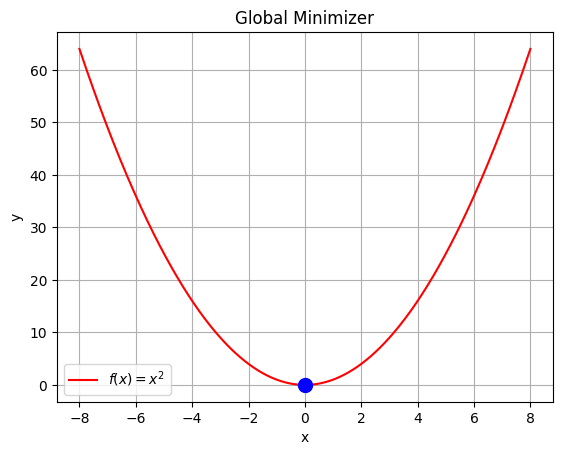

In [2]:
x = np.linspace(-8, 8, 400)
y = x**2

plt.plot(x, y, "r-", label=r"$f(x) = x^2$")
plt.scatter(0, 0, color="blue", s=100, zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title(r"Global Minimizer")
plt.legend()
plt.show()

### Local Minimizer

Let $f: \mathbb{R} \to \mathbb{R}$. A point $\hat{x} \in \mathbb{R}$ is a __local minimizer__ of $f(x)$ if there exists a $\delta > 0$ such that:

$$f(\hat{x}) \leq f(x),$$

for all $x \in \mathbb{R}$ with $\vert x - \hat{x}\vert < \delta$.

Example:

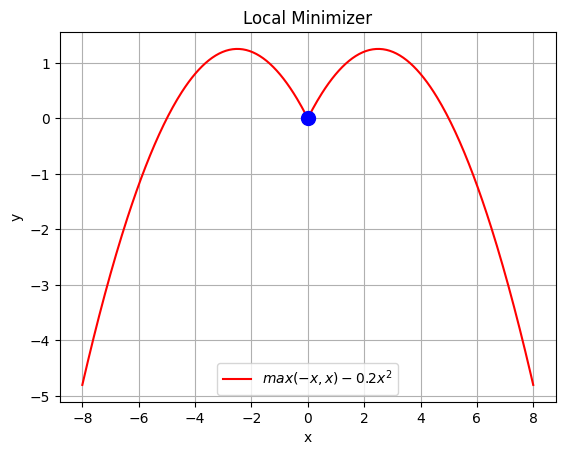

In [3]:
x = np.linspace(-8, 8, 400)
y = np.max(np.array([x, -x]), axis=0) - (0.2 * x**2)

plt.plot(x, y, "r-", label=r"$max(-x, x) - 0.2x^2$")
plt.scatter(0, 0, color="blue", s=100, zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title(r"Local Minimizer")
plt.legend()
plt.show()

* A global minimizer is always a local minimizer but the reverse is not right.
* However, if a function is convex, then its local minimizer is a global minimizer.

## Problem 3:

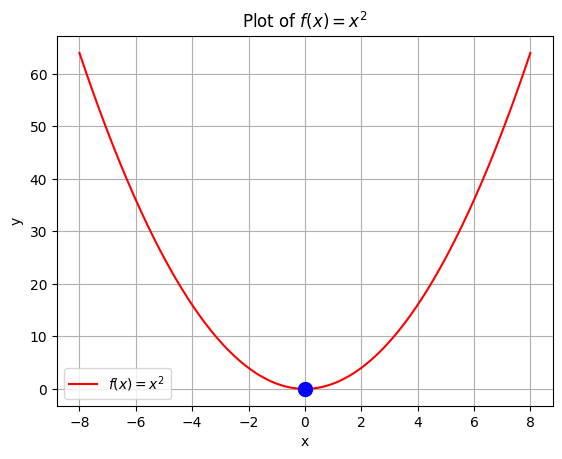

In [4]:
x = np.linspace(-8, 8, 400)
y = x**2

plt.plot(x, y, "r-", label=r"$f(x) = x^2$")
plt.scatter(0, 0, color="blue", s=100, zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title(r"Plot of $f(x) = x^2$")
plt.legend()
plt.show()

* Now, to show that $x^2$ is convex, we can start with the definition of a convex function.
* If a function is convex, it must follow the following inequality:
$$f(\lambda x + (1 - y)\lambda) \le \lambda f(x) + (1- \lambda)f(y)$$
* This holds true $\forall \lambda \in [0, 1]$.
* Now we use $f(x) = x^2$ and we get:
$$(\lambda x + (1 - y)\lambda)^2 \le \lambda x^2 + (1- \lambda)y^2$$
* which simplifies to:
$$(\lambda x + (1 - y)\lambda)^2 - \lambda x^2 - (1- \lambda)y^2 \le 0$$
* using the property, $(\lambda x + (1 - y)\lambda)^2 - \lambda x^2 - (1- \lambda)y^2 = \lambda (\lambda - 1)(x-y)^2$, we know have:

$$\lambda (\lambda - 1)(x-y)^2 \le 0$$

* The above basically checks if the left hand side is 0 or positive.
* Now, we know that $(x-y)^2$ is always going to be positive.
* Let's focus on $(\lambda - 1)$:
    * we know that $0 \le \lambda \le 1$
    * for $\lambda = 1$, we get $-1$
    * for $\lambda = 0$, we get $0$
    * for $\lambda = 0.99$, we get $-0.01$
    * this means that $(\lambda - 1) \le 0 ,\forall \lambda \in [0, 1]$
* Hence, the inequality holds and $f(x) = x^2$ must be a convex function.

## Problem 4

$e^x$ is a univariate convex function ([Source](https://www.princeton.edu/~aaa/Public/Teaching/ORF523/S16/ORF523_S16_Lec7_gh.pdf)) and its grah is as follows:


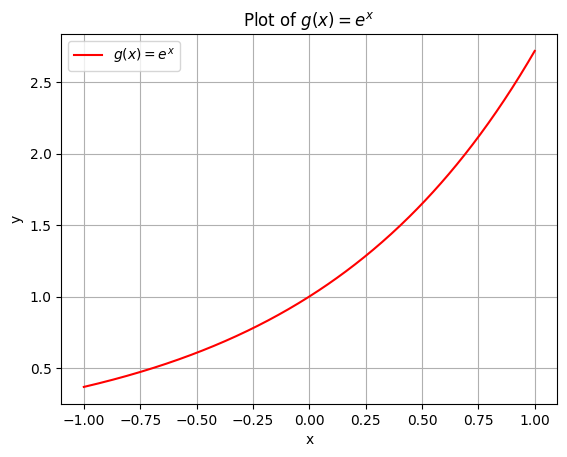

In [5]:
x = np.linspace(-1, 1, 400)
y = np.exp(x)

plt.plot(x, y, "r-", label=r"$g(x) = e^x$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title(r"Plot of $g(x) = e^x$")
plt.legend()
plt.show()

* We know that for a function, $f: \mathbb{R} \to \mathbb{R}$, if $f$ is twice continuously differentiable, it is convex iff:

$$f''(x) \ge 0, \forall x \in \mathbb{R}$$

* Taking the second-derivative of $e^x$, $f''(x) = e^x > 0, \forall x \in \mathbb{R}$
* Hence $e^x$ is a convex function.